# examine CATE as a function of community characteristics

In [1]:
import os, glob
import numpy as np

In [2]:
import corner as DFM
# --- plotting ---
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

## load CATE measurements

In [3]:
cv_cates = np.load('../dat/typology_covar.npy', allow_pickle=True)
cates    = np.load('../dat/typology_cate.npy', allow_pickle=True)
treats   = np.load('../dat/typology_y_treat.npy', allow_pickle=True)
controls = np.load('../dat/typology_y_control.npy', allow_pickle=True)
sig_cates= np.load('../dat/typology_sig_cate.npy', allow_pickle=True)

In [5]:
lbls = ['Precipitation (mm)', 'Flood Risk Score', 'Median Household Income (dollars)', 'Population',
        'Renter Fraction', 'Educated Fraction', 'White Fraction']

In [6]:
outreach_correction = 9780. # fixed impact of outreach

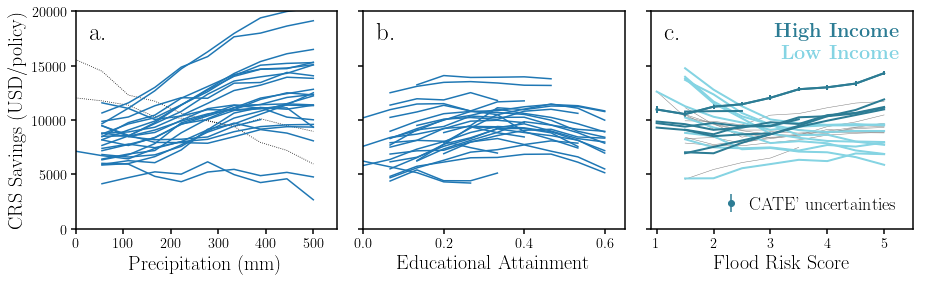

In [16]:
_ranges = [(0., 550.), (0.9, 4.7), (2.5e4, 1e5), (0, 4.5e4), (0., 0.75), (0., 0.7), (0.0, 1.)]

_i = 0
fig = plt.figure(figsize=(15, 4))
sub = fig.add_subplot(131)

# urban 
sub.plot(cv_cates[15], outreach_correction-1*np.array(cates[15]), c='k', lw=0.8, ls=':')
sub.plot(cv_cates[24], outreach_correction-1*np.array(cates[24]), c='k', lw=0.8, ls=':')

# the rest 
for i in range(27): 
    if i in [15, 24]: continue
    sub.plot(cv_cates[i], outreach_correction-1*np.array(cates[i]), c='C0')

sub.text(0.05, 0.95, 'a.', fontsize=25, transform=sub.transAxes, va='top', ha='left')
sub.set_xlabel('Precipitation (mm)', fontsize=20)        
sub.set_xlim(0., 550.)
sub.set_ylim(0., 20000.)


sub = fig.add_subplot(132)
# the rest 
for i in range(27): 
    sub.plot(cv_cates[81 + i], outreach_correction-1*np.array(cates[81 + i]), c='C0')
    
sub.text(0.05, 0.95, 'b.', fontsize=25, transform=sub.transAxes, va='top', ha='left')
sub.set_xlabel('Educational Attainment', fontsize=20)        
sub.set_xlim(0., 0.65)
sub.set_ylim(0., 20000.)
sub.set_yticklabels([])


sub = fig.add_subplot(133)
for i in range(27): 
    sub.plot(cv_cates[27 + i], outreach_correction-1*np.array(cates[27 + i]), c='gray', lw=0.5)

for i in [27, 28, 29, 30, 31, 32, 33, 34, 35]: 
    sub.plot(cv_cates[i], outreach_correction-1*np.array(cates[i]), c='#85D4E3', lw=2)
    
for i in range(45, 54): 
    sub.plot(cv_cates[i], outreach_correction-1*np.array(cates[i]), c='#2C7C94', lw=2)
    if i == 51: 
        sub.errorbar(cv_cates[i], outreach_correction-1*np.array(cates[i]), 
                     yerr=np.array(sig_cates[i]), c='#2C7C94', lw=2)
        sub.errorbar([], [], yerr=[], c='#2C7C94', fmt='o', label="CATE' uncertainties")
        sub.legend(loc='lower right', fontsize=18, handletextpad=0.)
        
sub.text(0.95, 0.95, r'{\bf High Income}', transform=sub.transAxes, 
         color='#2C7C94', fontsize=20, ha='right', va='top')
sub.text(0.95, 0.85, r'{\bf Low Income}', transform=sub.transAxes, 
         color='#85D4E3', fontsize=20, ha='right', va='top')
sub.text(0.05, 0.95, 'c.', fontsize=25, transform=sub.transAxes, va='top', ha='left')
sub.set_xlabel('Flood Risk Score', fontsize=20)        
sub.set_xlim(0.9, 5.5)
sub.set_ylim(0., 20000.)
sub.set_yticklabels([])


bkgd = fig.add_subplot(111, frameon=False)
bkgd.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
bkgd.set_ylabel(r'CRS Savings (USD/policy)', fontsize=20, labelpad=22)
fig.subplots_adjust(wspace=0.1)
fig.savefig('cate_multi.pdf', bbox_inches='tight')